In [2]:
# import necessary modules
from obspy import UTCDateTime
from obspy import Trace
from obspy import Stream
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from obspy.clients.fdsn import Client
from obspy.core.inventory.inventory import Inventory
client_wm = Client("IRIS")

In [3]:
#load the csv file into a DataFrame
import pandas as pd
df = pd.read_csv('Data/Anc_stations.csv')
print(df.to_string())

    sta_num sta_name net                   or_time
0         1     RC01  AK  2018-11-30T21:52:28.000Z
1         2     FIRE  AK  2018-11-30T21:52:28.000Z
2         3     CAPN  AK  2018-11-30T21:52:28.000Z
3         3      SLK  AK  2018-11-30T21:52:28.000Z
4         4      SWD  AK  2018-11-30T21:52:28.000Z
5         5      PWL  AK  2018-11-30T21:52:28.000Z
6         6      BAT  AK  2018-11-30T21:52:28.000Z
7         7      SSN  AK  2018-11-30T21:52:28.000Z
8         8      CUT  AK  2018-11-30T21:52:28.000Z
9         9      MCK  AK  2018-11-30T21:52:28.000Z
10       10     NEA2  AK  2018-11-30T21:52:28.000Z


In [5]:
#Get one waveform for each arrival time

#create an empty obspy stream
st = Stream()
inv = Inventory()
name = 'K223'
chan = 'HN?'
net='AK'
or_time = '2018-11-30T17:29:29.000Z'
or_time = UTCDateTime(or_time)

# show the station being loaded
print(name)                

# load one waveform and append it to st
st += client_wm.get_waveforms(net, name, "*", chan, or_time-10, or_time+60)
# create inventory for stations
inv = client_wm.get_stations(network=net, station=name, location="*", channel=chan, starttime=or_time-10, endtime=or_time+60, level='response')



K223


In [8]:
# show the contents of the obspy stream called st
# st
inv

Inventory created at 2023-02-17T21:37:42.463500Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2018-11-30...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			AK
		Stations (1):
			AK.K223 (Anchorage, Government Hill Elem. School, AK, USA)
		Channels (3):
			AK.K223..HNZ, AK.K223..HNN, AK.K223..HNE

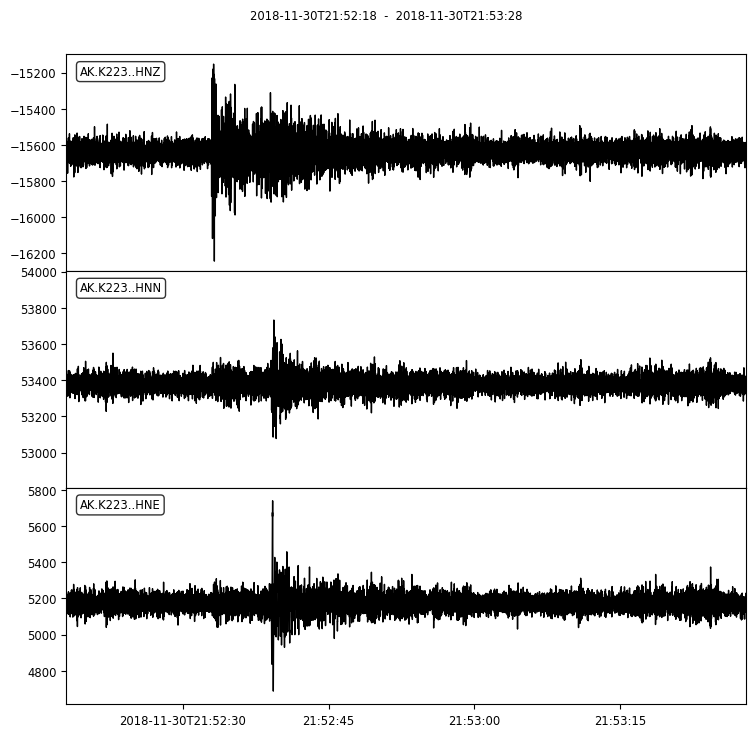

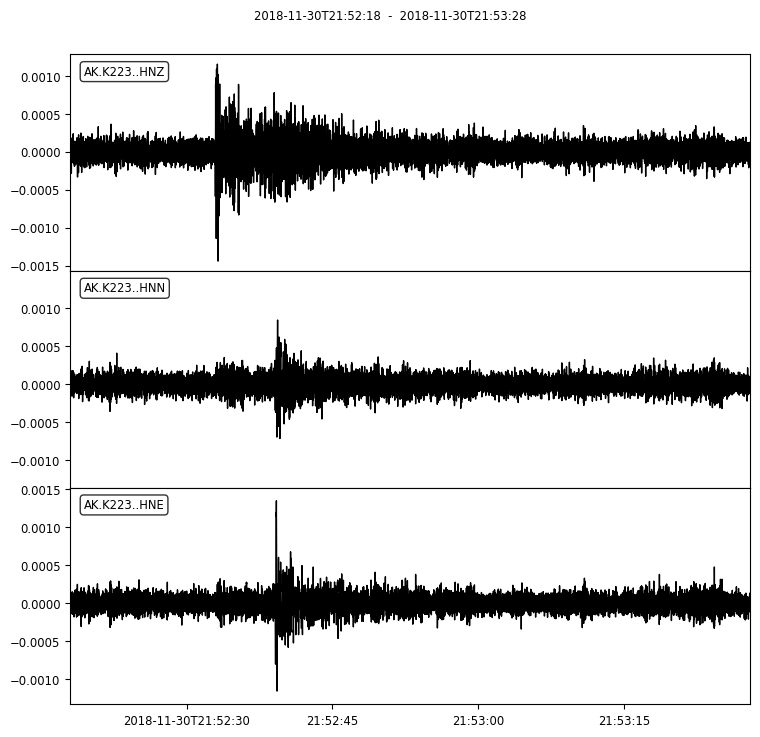

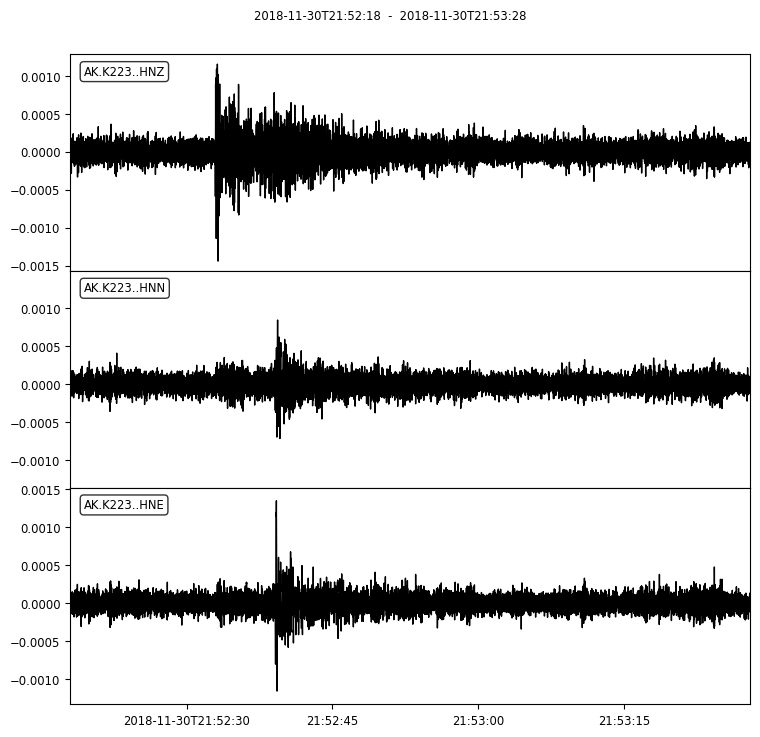

In [9]:
# define a filter band to prevent amplifying noise during the deconvolution
pre_filt = (1, 2, 30.0, 35.0)
st_filt = st.copy()
st_filt[0].data = st_filt[0].data * (1/419430)
st_filt[1].data = st_filt[1].data * (1/419430)
st_filt[2].data = st_filt[2].data * (1/419430)
st_filt.detrend('demean')
# st_filt.remove_response(inventory=inv, output='ACC', pre_filt=pre_filt)
st.plot()
st_filt.plot()

In [9]:
st[0]._get_response(inv)

Channel Response
	From m/s**2 (acceleration in meters per seconds squared) to counts (digital counts)
	Overall Sensitivity: 213947 defined at 0.030 Hz
	6 stages:
		Stage 1: PolesZerosResponseStage from m/s**2 to V, gain: 0.51009
		Stage 2: CoefficientsTypeResponseStage from V to counts, gain: 419430
		Stage 3: CoefficientsTypeResponseStage from counts to counts, gain: 1
		Stage 4: CoefficientsTypeResponseStage from counts to counts, gain: 1
		Stage 5: CoefficientsTypeResponseStage from counts to counts, gain: 1
		Stage 6: CoefficientsTypeResponseStage from counts to counts, gain: 1

AK.K223..HNZ | 2018-11-30T21:52:18.000000Z - 2018-11-30T21:53:28.000000Z | 200.0 Hz, 14001 samples

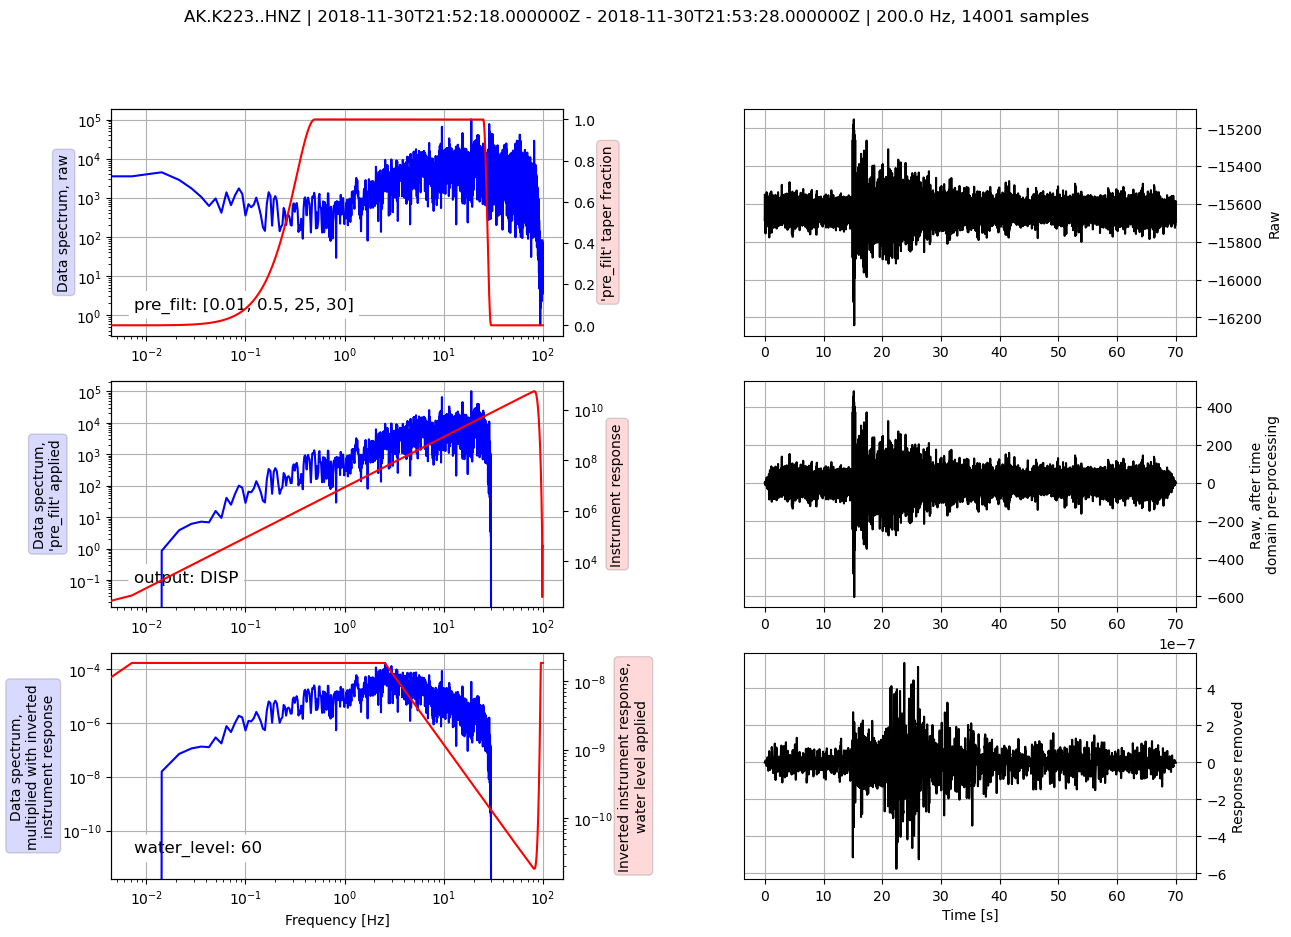

In [7]:
st_filt = st.copy()
tr = st_filt[2]
pre_filt = [0.01, .5, 25, 30]
tr.remove_response(inventory=inv, pre_filt=pre_filt, output="DISP",
                   water_level=60, plot=True)